In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[2, 1], [1, 2]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

(-6.0, 12.0)

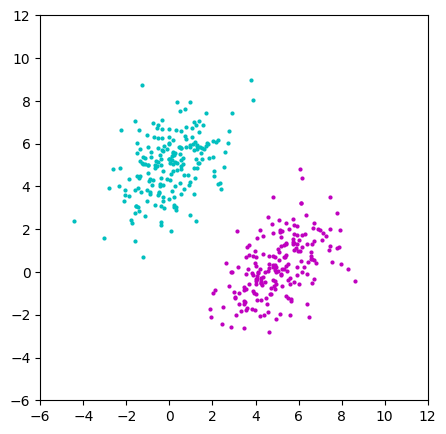

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-6, 12)
ax.set_ylim(-6, 12)

In [19]:
#Concatenaate data from two classes into one array
X = np.concatenate((X1,X2), axis = 0)

#Setting up targets(labels)
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

#Partitioning the data into training and test sets
rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex]
yr = y[rIndex]

#Training and test sets(half half)
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

(200, 2) (200,) (200, 2) (200,)


In [20]:
def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect +=1
  return 100*nCorrect/N

In [21]:
# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(2)
print(w)
# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
  # Select a data item at random
  #
  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]
  # If it is misclassified, update weights
  #
  if (y_train[r] * np.dot(x, w) < 0):
    w += alpha * y_train[r] * x
  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(X_train, y_train, w);
  P_test[iter] = PercentCorrect(X_test, y_test, w);
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

[ 0.38898899 -0.59742881]
Initial Percentage Correct:   0.50
Percentage Correct After Training: 100.00 100.00


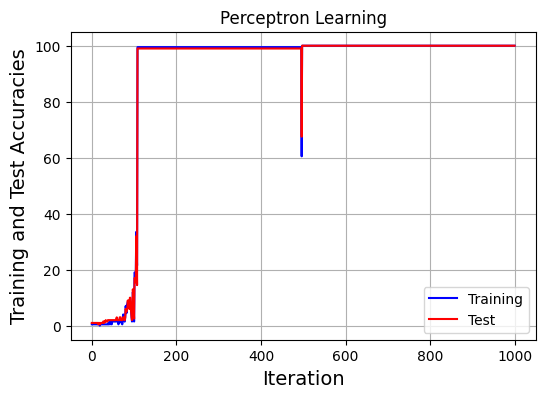

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

In [23]:
# Scikitlearn can do it for us
#
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))
yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))
if (accuracy_score(yh_test, y_test) > 0.99):
  print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


(-2.0, 15.0)

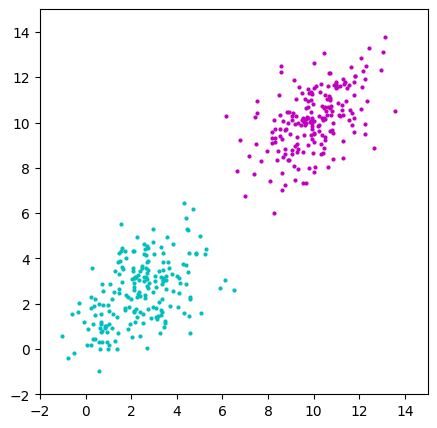

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[2.5, 2.5]]
m2 = [[10, 10]]
C = [[2, 1], [1, 2]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
Y1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
Y2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y1[:,0], Y1[:,1], c="c", s=4)
ax.scatter(Y2[:,0], Y2[:,1], c="m", s=4)
ax.set_xlim(-2, 15)
ax.set_ylim(-2, 15)

(200, 2) (200,) (200, 2) (200,)
[1.30376289 0.26447891]
Initial Percentage Correct:  49.00
Percentage Correct After Training:  62.00  55.50


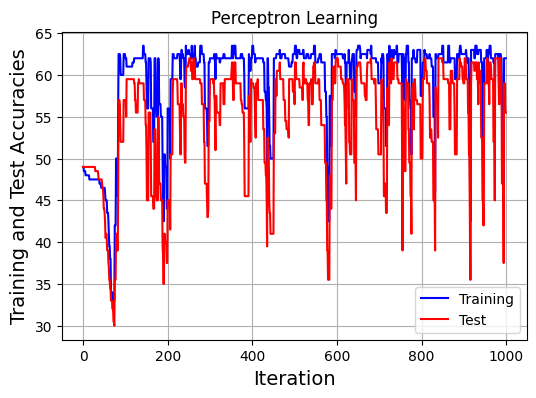

In [25]:
#Concatenaate data from two classes into one array
Y = np.concatenate((Y1,Y2), axis = 0)
w = np.random.randn(2)

#Setting up targets(labels)
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
z = np.concatenate((labelPos, labelNeg))

#Partitioning the data into training and test sets
rIndex = np.random.permutation(2*NumDataPerClass)
Yr = Y[rIndex]
zr = z[rIndex]

#Training and test sets(half half)
Y_train = Yr[0:NumDataPerClass]
z_train = zr[0:NumDataPerClass]
Y_test = Yr[NumDataPerClass:2*NumDataPerClass]
z_test = zr[NumDataPerClass:2*NumDataPerClass]
print(Y_train.shape, z_train.shape, Y_test.shape, z_test.shape)

Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

# Perceptron learning loop
#
# Random initialization of weights
#
a = np.random.randn(2)
print(a)

print('Initial Percentage Correct: %6.2f' %(PercentCorrect(Y_train, z_train, a)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
  # Select a data item at random
  #
  r = np.floor(np.random.rand()*Ntrain).astype(int)
  y = Y_train[r,:]
  # If it is misclassified, update weights
  #
  if (z_train[r] * np.dot(y, a) < 0):
    a += alpha * z_train[r] * y
  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(Y_train, z_train, a);
  P_test[iter] = PercentCorrect(Y_test, z_test, a);
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(Y_train, z_train, a), PercentCorrect(Y_test, z_test, a)))

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

In [26]:
#Concatenaate data from two classes into one array
Y = np.concatenate((Y1,Y2),0)
O = np.ones((2*NumDataPerClass, 1))
Y = np.append(Y, O, axis=1)
w = np.random.randn(2)

#Setting up targets(labels)
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
z = np.concatenate((labelPos, labelNeg))

#Partitioning the data into training and test sets
rIndex = np.random.permutation(2*NumDataPerClass)
Yr = Y[rIndex]
zr = z[rIndex]

#Training and test sets(half half)
Y_train = Yr[0:NumDataPerClass]
z_train = zr[0:NumDataPerClass]
Y_test = Yr[NumDataPerClass:2*NumDataPerClass]
z_test = zr[NumDataPerClass:2*NumDataPerClass]
print(Y_train.shape, z_train.shape, Y_test.shape, z_test.shape)

Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

# Perceptron learning loop
#
# Random initialization of weights
#
a = np.random.randn(3)
print(a)

print('Initial Percentage Correct: %6.2f' %(PercentCorrect(Y_train, z_train, a)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.001
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
  # Select a data item at random
  #
  r = np.floor(np.random.rand()*Ntrain).astype(int)
  y = Y_train[r,:]
  # If it is misclassified, update weights
  #
  if (z_train[r] * np.dot(y, a) < 0):
    a += alpha * z_train[r] * y
  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(Y_train, z_train, a);
  P_test[iter] = PercentCorrect(Y_test, z_test, a);
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(Y_train, z_train, a), PercentCorrect(Y_test, z_test, a)))

(200, 3) (200,) (200, 3) (200,)
[1.05636947 0.16260305 0.63471668]
Initial Percentage Correct:  48.50
Percentage Correct After Training:  82.00  90.00


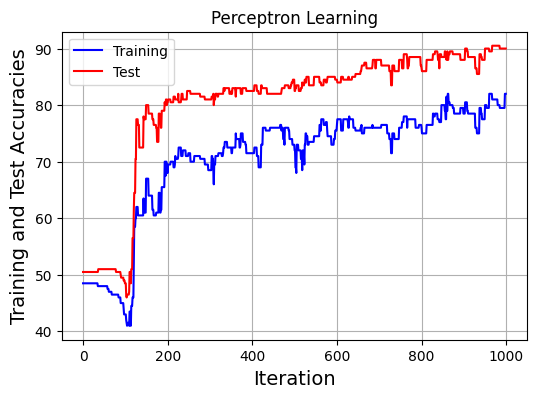

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [29]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [30]:
df["Churn"].unique()

array([0, 1])

In [31]:
#Converting target to 1 and -1
df["Churn"] = ((df["Churn"] == 1).astype(int)) * 2 - 1

In [32]:
df["Churn"].unique()
df.head(20)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,-1
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,-1
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,-1
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,-1
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,-1
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,-1
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,-1
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,-1
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,-1
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,-1


In [33]:
#Dividing the dataset to train and test
train, test = np.split(df.sample(frac=1), [int(0.6*len(df))])

In [34]:
#Function to scale the dataset
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [35]:
train, X_train, y_train = scale_dataset(train, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [36]:
# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(13)
print(w)
# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=10000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
  # Select a data item at random
  #
  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]
  # If it is misclassified, update weights
  #
  if (y_train[r] * np.dot(x, w) < 0):
    w += alpha * y_train[r] * x
  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(X_train, y_train, w);
  P_test[iter] = PercentCorrect(X_test, y_test, w);
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

[-2.03941576 -0.44279134  1.66287475  0.40565094 -0.63973118  0.76900936
  1.46401175 -0.01967425 -0.13822938  0.80618588 -0.964946    0.43903994
 -0.96712598]
Initial Percentage Correct:  31.86
Percentage Correct After Training:  73.75  69.76


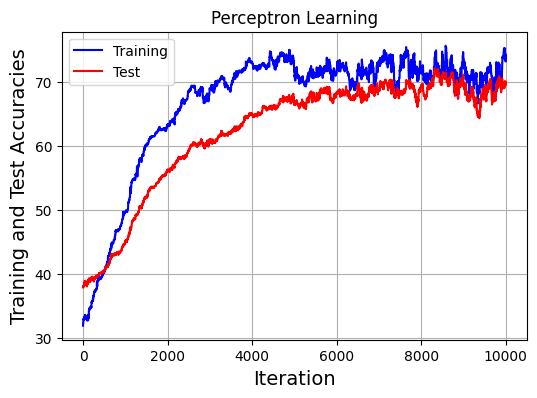

In [37]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves_2.png')